# Parts A and B:

In [1]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Adaline Algorithm:
<b> Adaline: </b>

In [2]:
class Adaline:
    def __init__(self, learning_rate, train):
        self.learning_rate = learning_rate
        self.train = train

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self):
        weight = [] # [x,y]
        for i in range(2):
            random.seed(i)
            rand = random.uniform(0, 0.01)
            rand = round(rand, 4)
            weight.append(rand)
        
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        EPS = 0.000001
        # generate weights and bias
        weight, bias = self._weight_genarate()

        # for each row we fix the bias and wights in order to get the minimum error
        for index, row in self.train.iterrows():
            predicted = bias + row['x'] * weight[0] + row['y'] * weight[1]

            weight[0] = round((weight[0] + self.learning_rate * (row['value'] - predicted) * row['x']), 3)
            weight[1] = round((weight[1] + self.learning_rate * (row['value'] - predicted) * row['y']), 3)
            bias = round((bias + self.learning_rate * (row['value'] - predicted)), 3)

            # error calculation
            error = (row['value'] - predicted) ** 2
            # if the error is small enough return
            if error <= EPS or error == 0:
                break
                
        return weight, bias

    # this function predicts on a test data and returns the number of correct predictions
    def predict(self, test, weight, bias):
        count = 0
        pred = []
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for index, row in test.iterrows():
            prediction = bias + (row['x'] * weight[0]) + (row['y'] * weight[1])
            if prediction > 0:
                prediction = 1
            else:
                prediction = -1
            pred.append(prediction)

            if prediction == row['value']:
                count += 1
        # now add the prediction list to the data set in order to make comparison 
        test['predict'] = pred
        return count

    # this function caculates the acuuracy of the predictions
    def score(self, pred, test):
        acurr = pred / len(test)
        res = round(acurr, 4)
        return res

<b> Main: </b>

In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['predict'] == 1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

<b> confussion matrix: </b> <br>
a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another). <br>
wikipedia - https://en.wikipedia.org/wiki/Confusion_matrix

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [7]:
# this is the main function
def main():
    part = input("Enter the relevant part (A or B): ")

    # part A
    if part == 'A':
        train = build_data_partA(1)
        test = build_data_partA(9)
        train.to_csv(r'C:\Users\talia\NeuroComputation\NeuroComputation\train_A.csv')
        test.to_csv(r'C:\Users\talia\NeuroComputation\NeuroComputation\test_A.csv')
        # run Adaline algorithm
        ada = Adaline(0.0001, train)
        weight, bias = ada.fit()
        ada_pred = ada.predict(test, weight, bias)
        ada_score = ada.score(ada_pred, test)
        print("Acurracy score:", ada_score * 100)
        
        # confusion matrix
        con_mat = confusion_matrix(test['value'], test['predict'])
        confussion_matrix(con_mat)
        print(classification_report(test['value'], test['predict']))
        plotting(test)

    # part B
    elif part == 'B':
        train = build_data_partB(9)
        test = build_data_partB(3)
        train.to_csv(r'C:\Users\talia\NeuroComputation\NeuroComputation\train_B.csv')
        test.to_csv(r'C:\Users\talia\NeuroComputation\NeuroComputation\test_B.csv')
        # run Adaline algorithm
        ada = Adaline(0.001, train)
        weight, bias = ada.fit()
        ada_pred = ada.predict(test, weight, bias)
        ada_score = ada.score(ada_pred, test)
        print("Acurracy score:", ada_score * 100)
        
        # confusion matrix
        con_mat = confusion_matrix(test['value'], test['predict'])
        confussion_matrix(con_mat)
        print(classification_report(test['value'], test['predict']))
        plotting(test)

    else:
        print("Not Valid")

### Reminder:
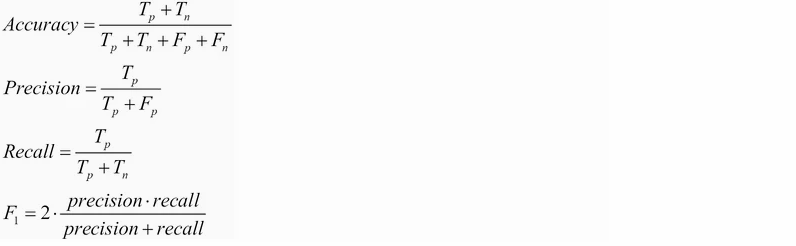

Enter the relevant part (A or B): A
Acurracy score: 94.89999999999999
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95       510
           1       0.91      1.00      0.95       490

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



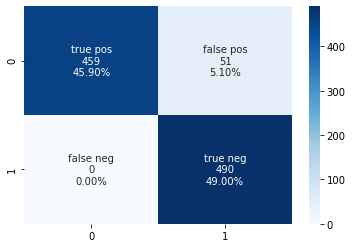

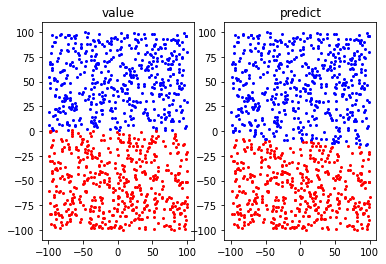

In [8]:
main()

Enter the relevant part (A or B): B
Acurracy score: 99.9
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



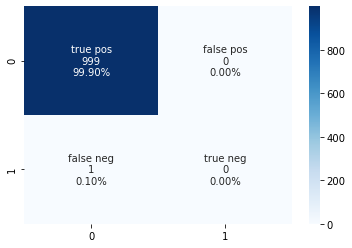

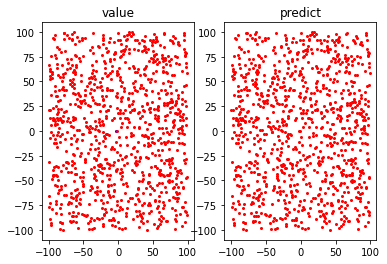

In [9]:
main()